# **MODULE 2**

# Data visualization and Technical Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2.1

**Load the week2.csv file into a dataframe.**

In [0]:
df1 = pd.read_csv("/content/drive/My Drive/DataScience/Aspiration Internship/week2.csv")

In [3]:
df1.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,year,month,vwap,PCT_change,Trend
0,INFY,EQ,2017-05-15,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67,2017,5,951.550000,0.000000,Slight or No change
1,INFY,EQ,2017-05-16,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,2017,5,953.125077,0.003626,Slight or No change
2,INFY,EQ,2017-05-17,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,2017,5,953.067084,-0.002304,Slight or No change
3,INFY,EQ,2017-05-18,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,2017,5,955.934447,0.009393,Slight positive
4,INFY,EQ,2017-05-19,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,2017,5,956.233874,-0.003951,Slight or No change


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  494 non-null    object 
 1   Series                  494 non-null    object 
 2   Date                    494 non-null    object 
 3   Prev Close              494 non-null    float64
 4   Open Price              494 non-null    float64
 5   High Price              494 non-null    float64
 6   Low Price               494 non-null    float64
 7   Last Price              494 non-null    float64
 8   Close Price             494 non-null    float64
 9   Average Price           494 non-null    float64
 10  Total Traded Quantity   494 non-null    int64  
 11  Turnover                494 non-null    float64
 12  No. of Trades           494 non-null    int64  
 13  Deliverable Qty         494 non-null    int64  
 14  % Dly Qt to Traded Qty  494 non-null    fl

**Convert the Date column from object type to datetime64 type**

In [0]:
 df1['Date']=pd.to_datetime(df1['Date'])

**Convert the Date column to the index of the dataframe.**

In [0]:
df1.set_index('Date', inplace=True)

In [7]:
df1.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,year,month,vwap,PCT_change,Trend
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,INFY,EQ,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67,2017,5,951.550000,0.000000,Slight or No change
2017-05-16,INFY,EQ,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,2017,5,953.125077,0.003626,Slight or No change
2017-05-17,INFY,EQ,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,2017,5,953.067084,-0.002304,Slight or No change
2017-05-18,INFY,EQ,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,2017,5,955.934447,0.009393,Slight positive
2017-05-19,INFY,EQ,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,2017,5,956.233874,-0.003951,Slight or No change


**Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is**

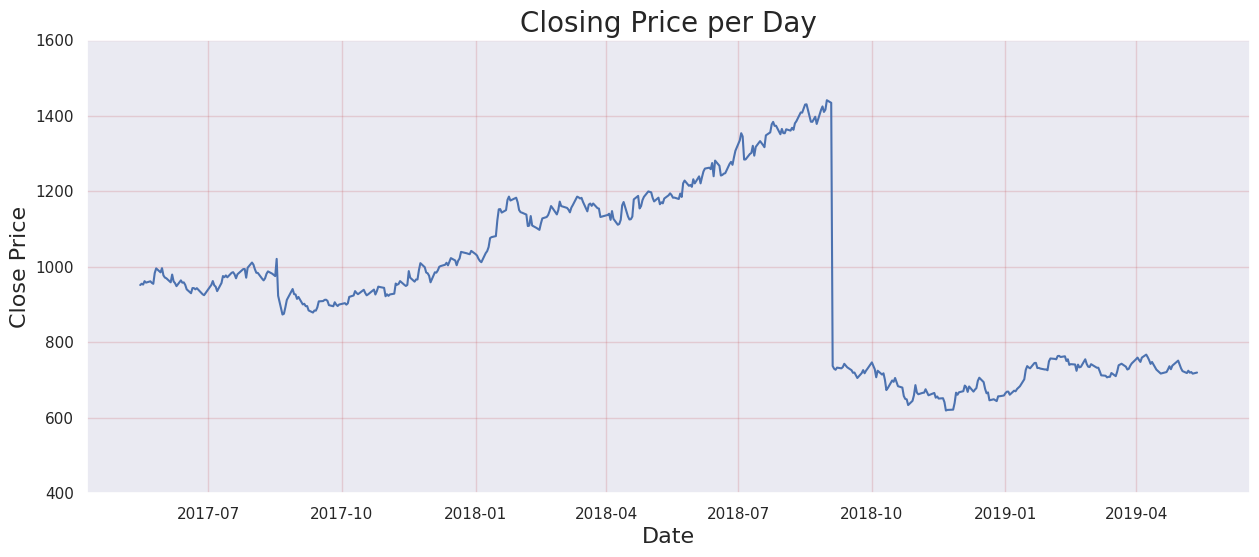

In [8]:
plt.figure(figsize=[15, 6], clear = True, dpi = 100)
sns.set(style = 'dark')
plt.grid(color='r',alpha=0.2)
plt.plot(df1['Close Price'])
plt.ylim(400,1600)
plt.xlabel("Date", size=16)
plt.ylabel("Close Price", size=16)
plt.title("Closing Price per Day", size=20)
plt.show()

In [9]:
df1.iloc[326:330]

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,year,month,vwap,PCT_change,Trend
Date,,,,,,,,,,,,,,,,,,,
2018-09-03,INFY,EQ,1441.10,1449.00,1467.90,1430.0,1436.2,1434.25,1451.30,5488164,7.964966e+09,134643,3571594,65.08,2018,9,1434.250000,-0.004753,Slight or No change
2018-09-04,INFY,EQ,1434.25,722.00,748.50,716.0,733.0,737.15,739.04,15370124,1.135916e+10,258728,6954062,45.24,2018,9,920.568655,-0.486038,Bear drop
2018-09-05,INFY,EQ,737.15,741.95,744.05,725.4,729.0,729.90,734.79,8658978,6.362540e+09,202826,3839883,44.35,2018,9,864.635436,-0.009835,Slight negative
2018-09-06,INFY,EQ,729.90,732.55,735.50,724.1,726.0,727.15,730.17,5598659,4.087989e+09,134849,3493840,62.40,2018,9,842.715636,-0.003768,Slight or No change


In [10]:
df1['PCT_change'].max()

0.046810910582444576

In [11]:
df1['PCT_change'].min()

-0.4860379989541572

In [12]:
df1['PCT_change'].idxmin()

Timestamp('2018-09-04 00:00:00')

**Explanation :**
*   During the month of September, there is a drastic change in the Infosys stock market
*   In 3rd Sep 2018, Shares of Infosys today rose as much as 1.86 per cent to a record high of Rs 1,467.9.
*   But fro 4th sep, it goes downward. 

There are many reasons behind it :
*    The September effect is associated with markets worldwide. Some analysts consider that the negative effect on markets is attributable to seasonal behavioral bias as investors change their portfolios at the end of summer to cash in.
*   Another reason could be that most mutual funds cash in their holdings to harvest tax losses.

## 2.2

**Display a stem plot of the daily change in of the stock price in percentage.**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


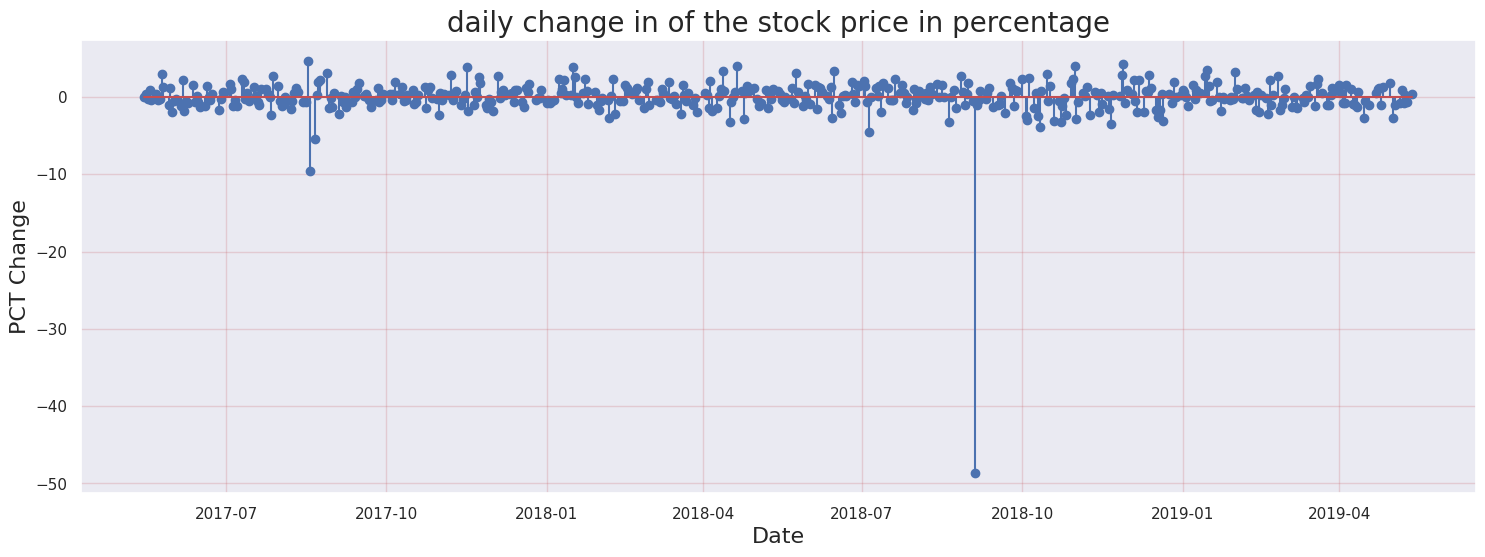

In [13]:
plt.figure(figsize=[18, 6], clear = True, dpi = 100)
sns.set(style = 'dark')
plt.grid(color='r',alpha=0.2)
plt.stem(df1.index.values,df1['PCT_change']*100)
plt.xlabel("Date", size=16)
plt.ylabel("PCT Change", size=16)
plt.title("daily change in of the stock price in percentage", size=20)
plt.show()

**Explanation :**
It can be observed that most of the changes in price on day to day between 10% but due their is one data point going nearly 50% in negative direction shows that the price of stock decreased by that margin on 2018-09-04.

## 2.3

**Plot the daily volumes**

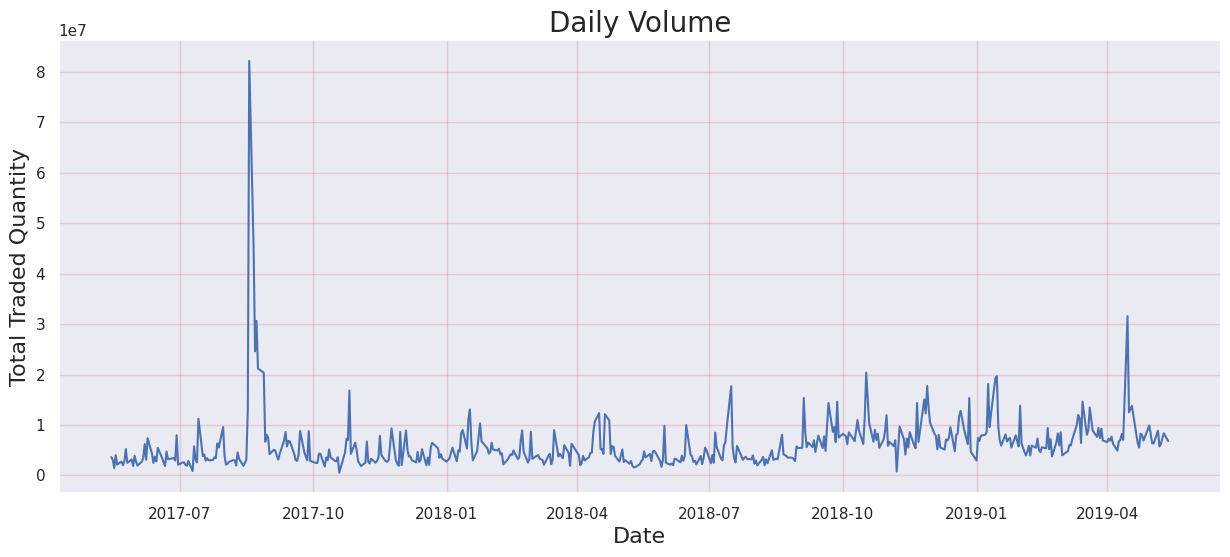

In [14]:
plt.figure(figsize=[15, 6], clear = True, dpi = 100)
sns.set(style = 'dark')
plt.grid(color='r',alpha=0.2)
plt.plot(df1['Total Traded Quantity'])
plt.xlabel("Date", size=16)
plt.ylabel("Total Traded Quantity", size=16)
plt.title("Daily Volume", size=20)
plt.show()

**compare the percentage stem plot with Daily Volume**

In [0]:
max_old = df1['Total Traded Quantity'].max()
min_old = df1['Total Traded Quantity'].min()
tota_traded_quantity_normalized = ((df1['Total Traded Quantity'] - min_old)/(max_old - min_old)) * (1 - 0) + 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


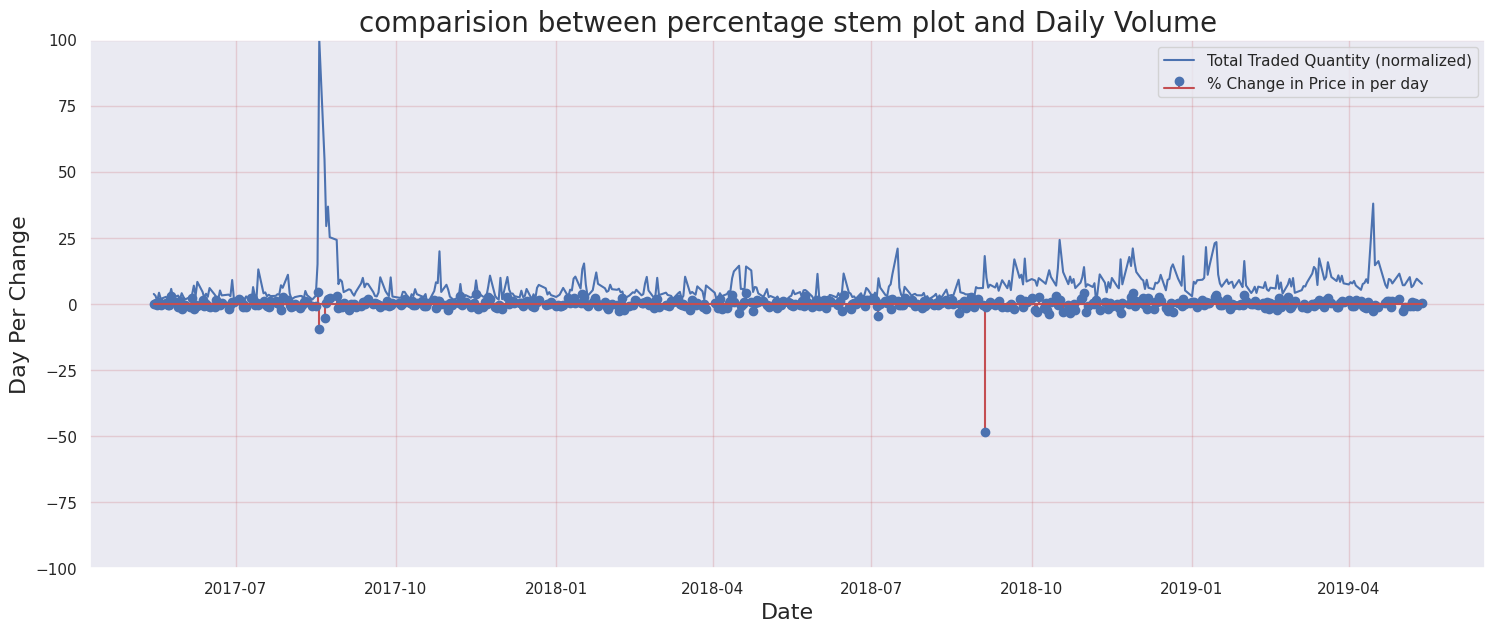

In [16]:
plt.figure(figsize=[18, 7], clear = True, dpi = 100)
sns.set(style = 'dark')
plt.grid(color='r',alpha=0.2)
plt.plot(tota_traded_quantity_normalized*100)
plt.stem(df1.index.values,df1['PCT_change']*100,linefmt = 'C3')
plt.ylim(-100,100)
plt.xlabel('Date', size=16)
plt.ylabel('Day Per Change', size=16)
plt.legend(['Total Traded Quantity (normalized)', '% Change in Price in per day'])
plt.title("comparision between percentage stem plot and Daily Volume", size=20)
plt.show()

**Explanation :**

Wheneven there is a increase in Volume, also increase Day percentage change.

Similarly if there is a decrease in Volume, also decrease in Day percentage change.

## 2.4

In [0]:
total_traded_quantity_in_Trends = dict(df1.groupby('Trend')['Total Traded Quantity'].sum())

In [18]:
total_traded_quantity_in_Trends.values()

dict_values([151087534, 131746836, 97572604, 490171179, 705486215, 316370979, 725085416, 374323658])

In [19]:
count_total_traded_quantity_in_Trends = df1.groupby('Trend')['Symbol'].count()
count_total_traded_quantity_in_Trends

Trend
Among top gainers       12
Among top losers         9
Bear drop                2
Negative                87
Positive               106
Slight negative         58
Slight or No change    156
Slight positive         64
Name: Symbol, dtype: int64

In [20]:
key = list(total_traded_quantity_in_Trends.keys())
key

['Among top gainers',
 'Among top losers',
 'Bear drop',
 'Negative',
 'Positive',
 'Slight negative',
 'Slight or No change',
 'Slight positive']

In [21]:
values = []
for i in range(len(key)):
    
    aux_data = df1[df1['Trend'] == key[i]]['Total Traded Quantity']
    values.append([key[i], aux_data.mean(), aux_data.median()])
    print(values[i])

['Among top gainers', 12590627.833333334, 12042170.5]
['Among top losers', 14638537.333333334, 10985897.0]
['Bear drop', 48786302.0, 48786302.0]
['Negative', 5634151.482758621, 5088554.0]
['Positive', 6655530.3301886795, 5523811.5]
['Slight negative', 5454672.051724138, 4616803.0]
['Slight or No change', 4647983.435897436, 4043539.5]
['Slight positive', 5848807.15625, 5301784.0]


In [22]:
total_traded_quantity_in_Trends.keys()

dict_keys(['Among top gainers', 'Among top losers', 'Bear drop', 'Negative', 'Positive', 'Slight negative', 'Slight or No change', 'Slight positive'])

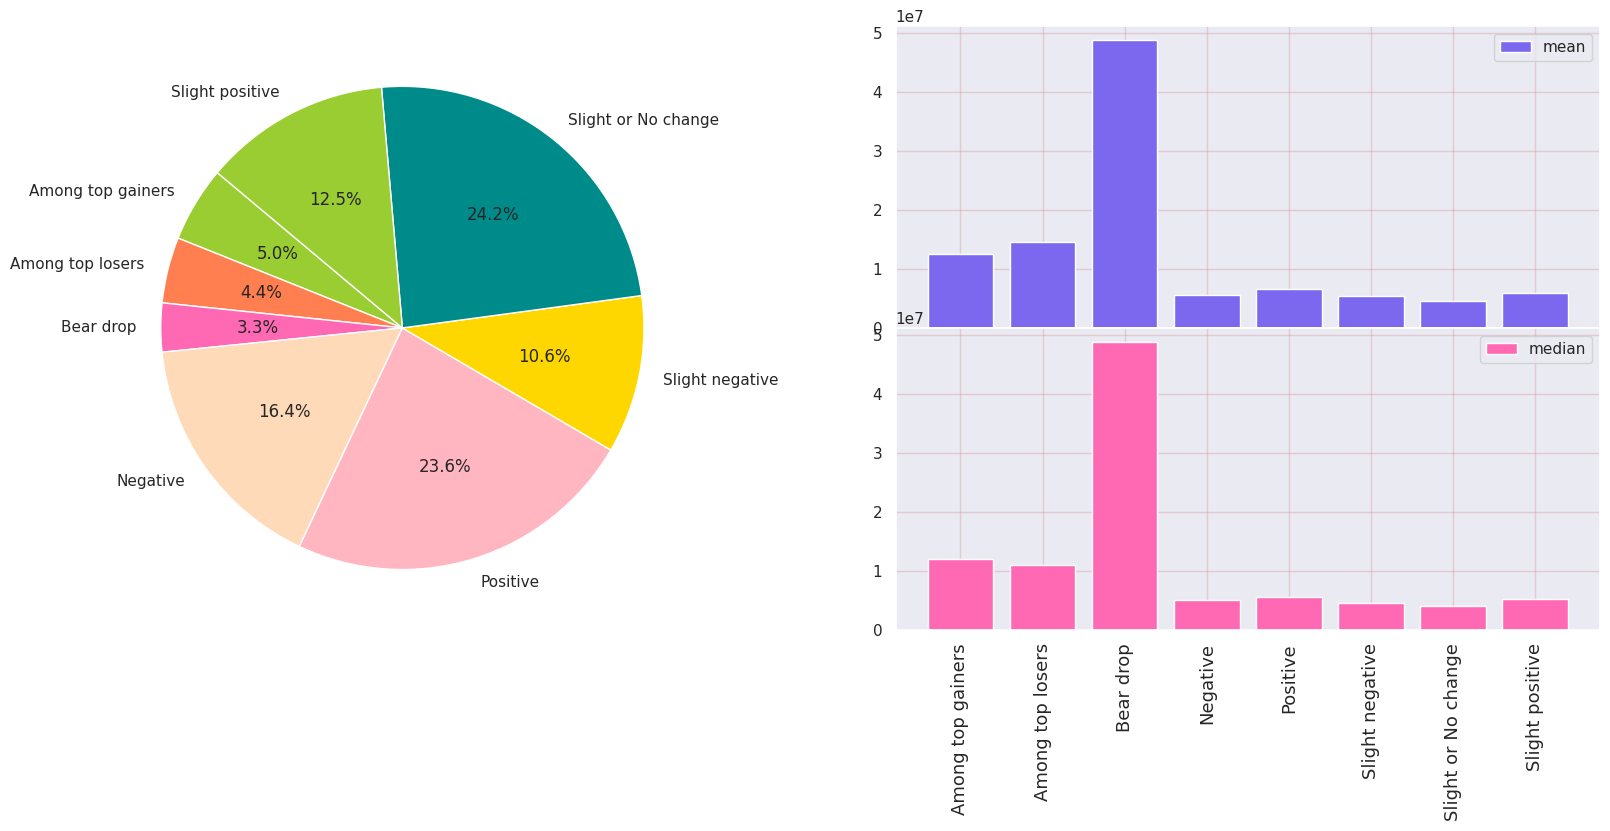

In [23]:
plt.figure(figsize = (20,8), dpi = 100)
grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.0)

plt.subplot(grid[0:, 0])
plt.subplot(1,2,1)

colors = ['yellowgreen', 'coral', 'hotpink', 'peachpuff', 'lightpink', 'gold','darkcyan']
pie_plot = plt.pie(total_traded_quantity_in_Trends.values(), labels = total_traded_quantity_in_Trends.keys(),
                  autopct = '%1.1f%%', startangle=140, colors = colors)

ax1 = plt.subplot(grid[0,1])
plt.grid(color = 'r', alpha = 0.2)
plt.bar([val_key[0] for val_key in values], [val_mean[1] for val_mean in values], color = 'mediumslateblue')
plt.xticks(rotation=90, size = 13)
plt.legend(['mean'])

ax2 = plt.subplot(grid[1,1], sharex = ax1)
plt.grid(color = 'r', alpha = 0.2)
plt.bar([val_key[0] for val_key in values], [val_median[2] for val_median in values], color = 'hotpink')
plt.legend(['median'])

plt.xticks(rotation=90, size = 13)

plt.show()


## 2.5

**Plot the daily return (percentage) distribution as a histogram.**

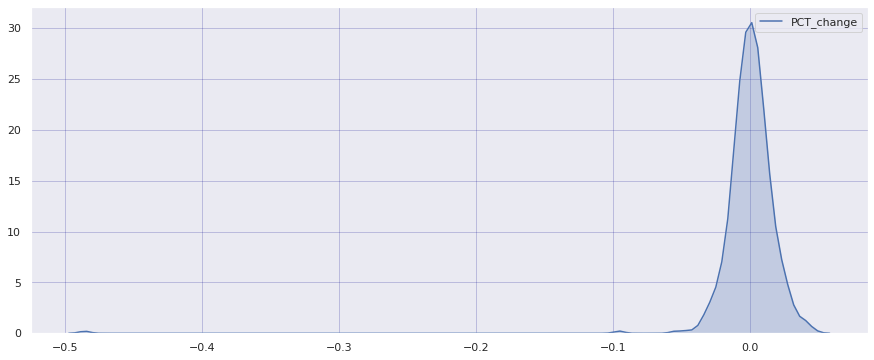

In [24]:
plt.figure(figsize = (15,6))
sns.set(style = 'dark')
plt.grid(True, color = 'darkBlue', alpha = 0.2)
sns.kdeplot(df1['PCT_change'], shade = True)
plt.show()

## 2.6

**Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.**

In [0]:
df01 = pd.read_csv("/content/drive/My Drive/DataScience/Aspiration Internship/BAJAJELEC.csv")
index_drop = df01.Series[df01['Series'] != 'EQ'].index
df01.drop(index_drop, inplace=True)
df01['Date']=pd.to_datetime(df01['Date'])
df01.set_index('Date', inplace=True)

df02 = pd.read_csv("/content/drive/My Drive/DataScience/Aspiration Internship/FORTIS.csv")
index_drop = df02.Series[df02['Series'] != 'EQ'].index
df02.drop(index_drop, inplace=True)
df02['Date']=pd.to_datetime(df02['Date'])
df02.set_index('Date', inplace=True)


df03 = pd.read_csv("/content/drive/My Drive/DataScience/Aspiration Internship/IDFC.csv")
index_drop = df03.Series[df03['Series'] != 'EQ'].index
df03.drop(index_drop, inplace=True)
df03['Date']=pd.to_datetime(df03['Date'])
df03.set_index('Date', inplace=True)


df04 = pd.read_csv("/content/drive/My Drive/DataScience/Aspiration Internship/LALPATHLAB.csv")
index_drop = df04.Series[df04['Series'] != 'EQ'].index
df04.drop(index_drop, inplace=True)
df04['Date']=pd.to_datetime(df04['Date'])
df04.set_index('Date', inplace=True)


df05 = pd.read_csv("/content/drive/My Drive/DataScience/Aspiration Internship/JKLAKSHMI.csv")
index_drop = df05.Series[df05['Series'] != 'EQ'].index
df05.drop(index_drop, inplace=True)
df05['Date']=pd.to_datetime(df05['Date'])
df05.set_index('Date', inplace=True)



In [26]:
print(df01.shape)
print(df02.shape)
print(df03.shape)
print(df04.shape)
print(df05.shape)

(494, 14)
(494, 14)
(494, 14)
(494, 14)
(494, 14)


In [0]:
multi_df = pd.DataFrame({'BAJAJELEC':df01['Close Price'],
                                    'FORTIS': df02['Close Price'],
                                    'IDFC':df03['Close Price'],
                                    'LALPATHLAB': df04['Close Price'],
                                    'JKLAKSHMI': df05['Close Price']})

In [28]:
multi_df.head()

,BAJAJELEC,FORTIS,IDFC,LALPATHLAB,JKLAKSHMI
Date,,,,,
2017-05-15,341.15,205.25,63.70,900.60,510.80
2017-05-16,347.00,207.90,64.25,910.95,527.50
2017-05-17,349.85,205.90,63.35,911.70,516.20
2017-05-18,334.10,196.85,61.50,909.75,478.95
2017-05-19,336.20,203.55,61.15,910.25,469.55


In [29]:
multi_df.shape

(494, 5)

In [30]:
multi_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 494 entries, 2017-05-15 to 2019-05-13
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BAJAJELEC   494 non-null    float64
 1   FORTIS      494 non-null    float64
 2   IDFC        494 non-null    float64
 3   LALPATHLAB  494 non-null    float64
 4   JKLAKSHMI   494 non-null    float64
dtypes: float64(5)
memory usage: 23.2 KB


In [0]:
multi_df_pct_change = pd.DataFrame({'BAJAJELEC':df01['Close Price'].pct_change(),
                                    'FORTIS': df02['Close Price'].pct_change(),
                                    'IDFC':df03['Close Price'].pct_change(),
                                    'LALPATHLAB': df04['Close Price'].pct_change(),
                                    'JKLAKSHMI': df05['Close Price'].pct_change()})

In [32]:
multi_df_pct_change.head()

,BAJAJELEC,FORTIS,IDFC,LALPATHLAB,JKLAKSHMI
Date,,,,,
2017-05-15,NaN,NaN,NaN,NaN,NaN
2017-05-16,0.017148,0.012911,0.008634,0.011492,0.032694
2017-05-17,0.008213,-0.009620,-0.014008,0.000823,-0.021422
2017-05-18,-0.045019,-0.043953,-0.029203,-0.002139,-0.072162
2017-05-19,0.006286,0.034036,-0.005691,0.000550,-0.019626


In [0]:
multi_df_pct_change.dropna(inplace=True)

In [34]:
multi_df_pct_change.shape

(493, 5)

**Using seaborn, analyse the correlation between the percentage changes in the five stocks.**

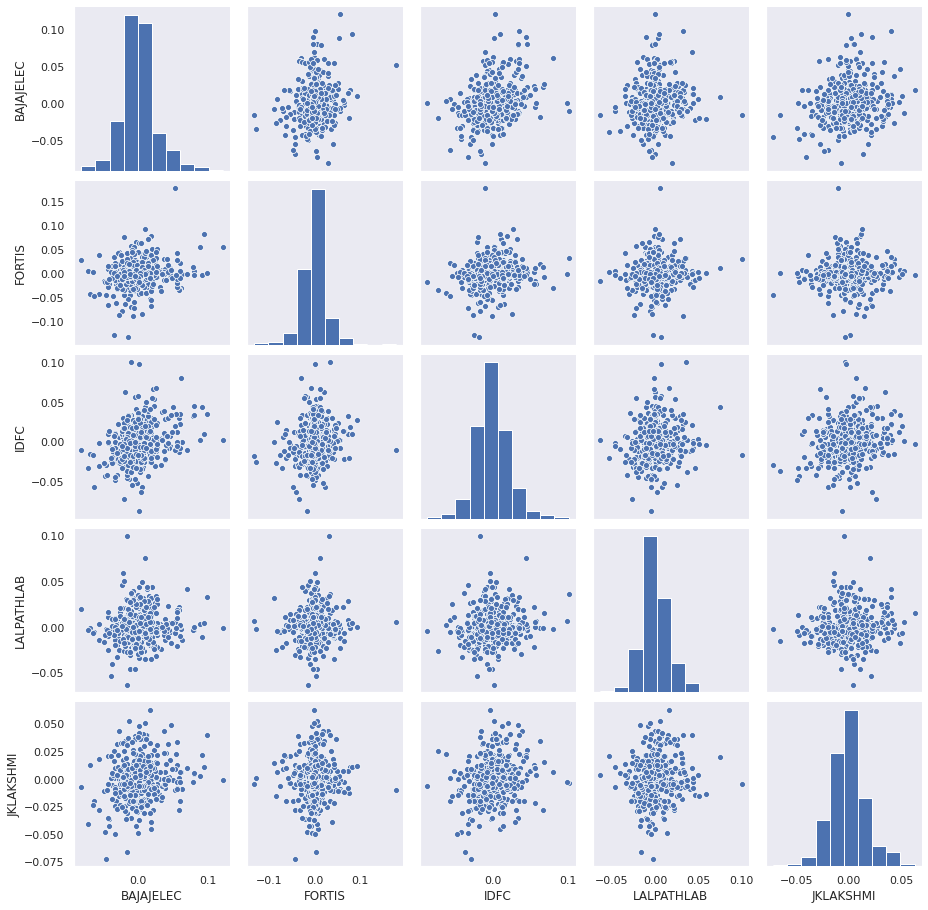

In [35]:
sns.pairplot(multi_df_pct_change)
plt.show()

## 2.7

**Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.**

In [0]:
rolling_avg_7day = multi_df_pct_change['IDFC'].rolling(7).mean()
rolling_avg_7day.dropna(inplace = True)

In [37]:
std_deviation = rolling_avg_7day.std()
std_deviation

0.008456460832985924

In [38]:
rolling_avg_7day.mean()

-0.0007796284414628346

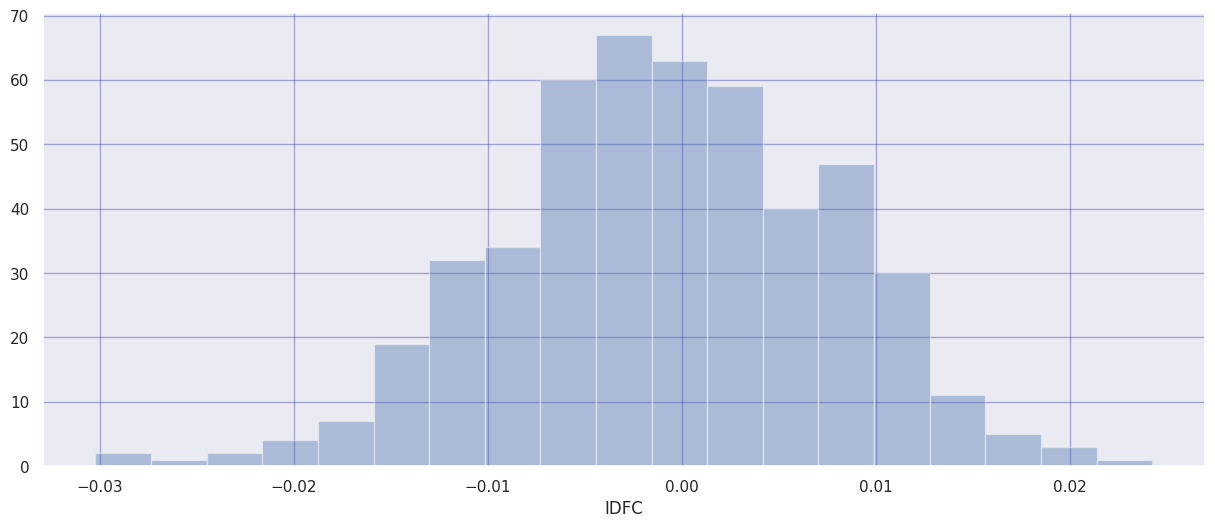

In [39]:
plt.figure(figsize = (15,6), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)
sns.distplot(rolling_avg_7day, kde = False)
plt.show()

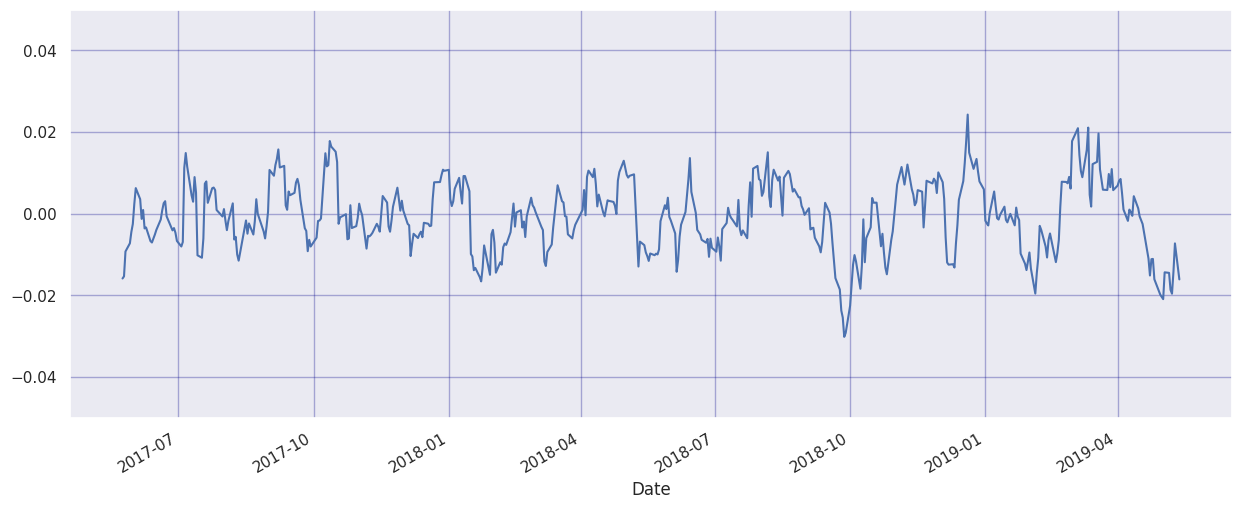

In [40]:
plt.figure(figsize = (15,6), dpi = 100)
rolling_avg_7day.plot()
plt.ylim(-0.050,0.050)
plt.grid(color = 'darkBlue', alpha = 0.3)
plt.show()

## 2.8

**Calculate the volatility for the Nifty index and compare the 2.**

In [0]:
nifty50 = pd.read_csv("/content/drive/My Drive/DataScience/Aspiration Internship/Nifty50.csv")

In [42]:
nifty50.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [43]:
print(nifty50.shape)
nifty50['Date']=pd.to_datetime(nifty50['Date'])
nifty50.set_index('Date', inplace=True)

(494, 7)


In [0]:
nifty_per_change = nifty50['Close'].pct_change()
nifty_per_change.dropna(inplace = True)

In [0]:
nifty_rolling_average_7_day = nifty_per_change.rolling(7,axis = 0).mean()
nifty_rolling_average_7_day.dropna(inplace = True)

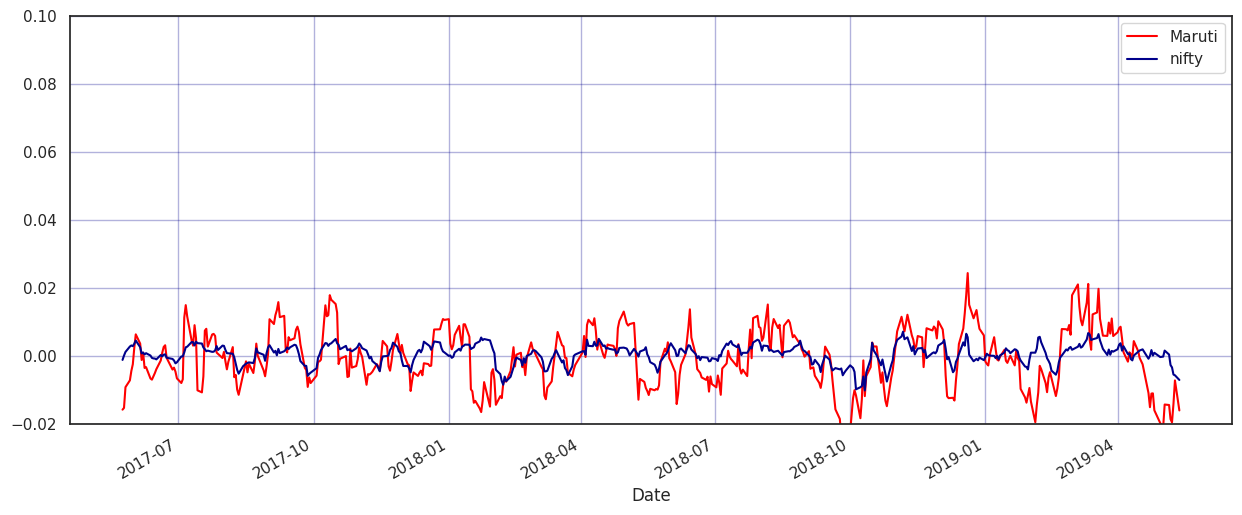

In [46]:
plt.figure(figsize = (15,6), dpi = 100)
sns.set(style = 'white')
rolling_avg_7day.plot(color = 'red')
nifty_rolling_average_7_day.plot(color = 'darkBlue')
plt.ylim(-0.02,0.1)
plt.legend(['Maruti', 'nifty'])
plt.grid(color = 'darkBlue', alpha = 0.3)
plt.show()

## 2.9

**Plot the 21 day and 34 day Moving average with the average price and decide a Call !Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average.One of the most widely used technical indicators.**

In [0]:
short_day = 21
long_day = 34

signals = pd.DataFrame(index = df1.index)

In [0]:
signals['signal']=0.0

In [0]:
signals['short_avg'] = df1['Close Price'].rolling(window = short_day, min_periods = 1, center=False).mean()
signals['long_avg'] = df1['Close Price'].rolling(window = long_day, min_periods = 1, center=False).mean()


In [0]:
signals['signal'][short_day:] = np.where(signals['short_avg'][short_day:] > signals['long_avg'][short_day:], 1.0, 0.0 )

In [51]:
signals['positions'] = signals['signal'].diff()
signals

,signal,short_avg,long_avg,positions
Date,,,,
2017-05-15,0.0,951.550000,951.550000,NaN
2017-05-16,0.0,953.275000,953.275000,0.0
2017-05-17,0.0,953.116667,953.116667,0.0
2017-05-18,0.0,955.275000,955.275000,0.0
2017-05-19,0.0,955.810000,955.810000,0.0
...,...,...,...,...
2019-05-07,1.0,738.147619,736.216176,0.0
2019-05-08,0.0,736.530952,736.539706,-1.0
2019-05-09,0.0,735.252381,736.613235,0.0


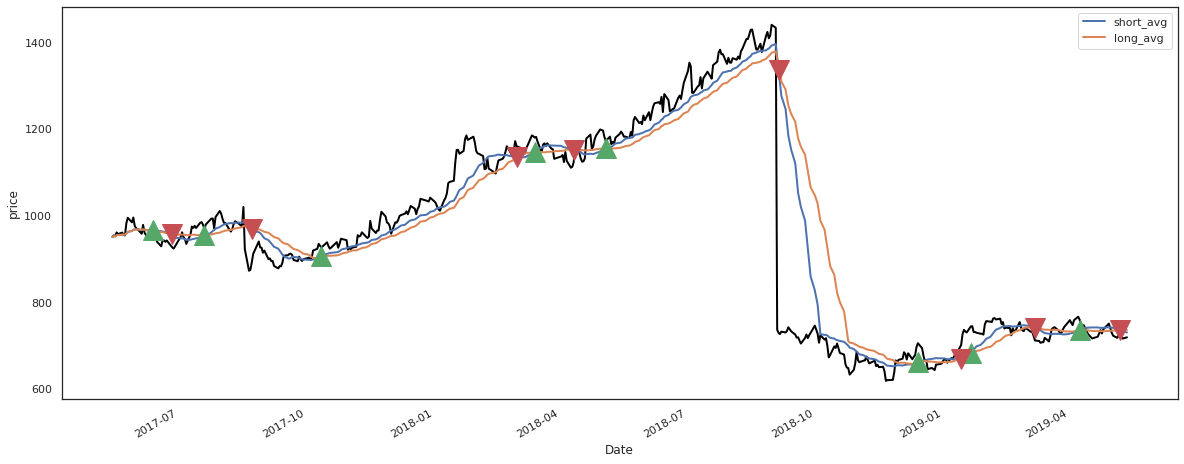

In [52]:
fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(111, ylabel='price')
df1['Close Price'].plot(ax=ax1, color='black', lw=2.)

signals[['short_avg', 'long_avg']].plot(ax=ax1, lw=2.)

ax1.plot(signals.loc[signals.positions == 1.0].index, signals.short_avg[signals.positions == 1.0], '^', markersize=20, color='g')

ax1.plot(signals.loc[signals.positions == -1.0].index, signals.short_avg[signals.positions == -1.0], 'v', markersize=20, color='r')

plt.show()

## 2.10

**Trade Calls - Using Bollinger Bands**
**Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the averageThe bollinger bands comprise the following data points-**


*   The 14 day rolling mean of the closing price (we call it the average)
*   Upper band which is the rolling mean + 2 standard deviations away from the average.
*   Lower band which is the rolling mean - 2 standard deviations away from the average.
*   Average Daily stock price.

**Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market.**



In [0]:
new_df = pd.DataFrame({'14_day_Avg': df1['Close Price'].rolling(14).mean(),
                        '14_day_std':df1['Close Price'].rolling(14).std(),
                        'Close Price':df1['Close Price']})

In [0]:
new_df['Upper_Band'] = new_df['14_day_Avg'] + new_df['14_day_std']*2
new_df['Lower_Band'] = new_df['14_day_Avg'] - new_df['14_day_std']*2

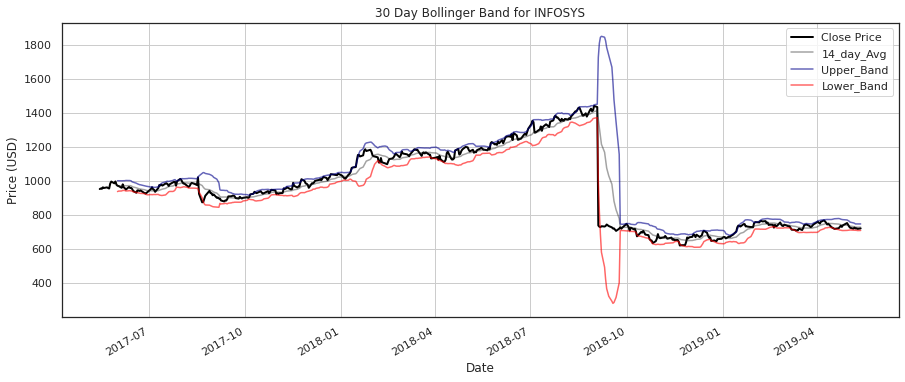

In [55]:
plt.figure(figsize = (15,6))
new_df['Close Price'].plot(color = 'black', linewidth = 2)
new_df['14_day_Avg'].plot(color = 'k', alpha = 0.4)
new_df['Upper_Band'].plot(color = 'darkBlue', alpha = 0.6)
new_df['Lower_Band'].plot(color = 'red', alpha = 0.6)
plt.legend()
plt.grid(True)
plt.title('30 Day Bollinger Band for INFOSYS')
plt.ylabel('Price (USD)')
plt.show();

**Save to a new csv file**

In [0]:
df1.to_csv (r'/content/drive/My Drive/DataScience/Aspiration Internship/week3.csv', index = False, header=True)

In [57]:
df1.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,year,month,vwap,PCT_change,Trend
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,INFY,EQ,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67,2017,5,951.550000,0.000000,Slight or No change
2017-05-16,INFY,EQ,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,2017,5,953.125077,0.003626,Slight or No change
2017-05-17,INFY,EQ,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,2017,5,953.067084,-0.002304,Slight or No change
2017-05-18,INFY,EQ,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,2017,5,955.934447,0.009393,Slight positive
2017-05-19,INFY,EQ,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,2017,5,956.233874,-0.003951,Slight or No change


In [59]:
new_df.head(20)

,14_day_Avg,14_day_std,Close Price,Upper_Band,Lower_Band
Date,,,,,
2017-05-15,NaN,NaN,951.55,NaN,NaN
2017-05-16,NaN,NaN,955.00,NaN,NaN
2017-05-17,NaN,NaN,952.80,NaN,NaN
2017-05-18,NaN,NaN,961.75,NaN,NaN
2017-05-19,NaN,NaN,957.95,NaN,NaN
2017-05-22,NaN,NaN,961.45,NaN,NaN
2017-05-23,NaN,NaN,957.30,NaN,NaN
2017-05-24,NaN,NaN,954.80,NaN,NaN
2017-05-25,NaN,NaN,983.30,NaN,NaN


In [0]:
new_df.to_csv (r'/content/drive/My Drive/DataScience/Aspiration Internship/week3_1.csv', index = False, header=True)